## Time Series submission - Dicoding Academy
#### Aditya Nur'ahya

### Import library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout


### Dataset menggunakan US Pollution dari tahun 2000 - 2016

Data yang tercatat terlalu besar dan saya memutuskan untuk memakai 184381 Baris dari dataset

In [19]:
df1 = pd.read_csv('/content/pollution_us_2000_2016.csv')
df1

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19,34,Parts per million,0.013375,0.032,10,27,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184376,3259,4,19,1011,"1237 S. BEVERLY , TUCSON",Arizona,Pima,Tucson,2002-10-05,Parts per billion,17.958333,41.0,0,39,Parts per million,0.030792,0.048,9,41,Parts per billion,1.000000,2.0,0,3.0,Parts per million,0.445833,0.7,0,8.0
184377,3260,4,19,1011,"1237 S. BEVERLY , TUCSON",Arizona,Pima,Tucson,2002-10-05,Parts per billion,17.958333,41.0,0,39,Parts per million,0.030792,0.048,9,41,Parts per billion,0.987500,1.3,2,NaN,Parts per million,0.408333,0.8,0,NaN
184378,3261,4,19,1011,"1237 S. BEVERLY , TUCSON",Arizona,Pima,Tucson,2002-10-05,Parts per billion,17.958333,41.0,0,39,Parts per million,0.030792,0.048,9,41,Parts per billion,0.987500,1.3,2,NaN,Parts per million,0.445833,0.7,0,8.0
184379,3262,4,19,1011,"1237 S. BEVERLY , TUCSON",Arizona,Pima,Tucson,2002-10-06,Parts per billion,16.750000,32.0,0,30,Parts per million,0.033167,0.052,10,44,Parts per billion,1.291667,8.0,9,11.0,Parts per million,0.370833,0.6,0,NaN


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184381 entries, 0 to 184380
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         184381 non-null  int64  
 1   State Code         184381 non-null  int64  
 2   County Code        184381 non-null  int64  
 3   Site Num           184381 non-null  int64  
 4   Address            184381 non-null  object 
 5   State              184381 non-null  object 
 6   County             184381 non-null  object 
 7   City               184381 non-null  object 
 8   Date Local         184381 non-null  object 
 9   NO2 Units          184381 non-null  object 
 10  NO2 Mean           184381 non-null  float64
 11  NO2 1st Max Value  184381 non-null  float64
 12  NO2 1st Max Hour   184381 non-null  int64  
 13  NO2 AQI            184381 non-null  int64  
 14  O3 Units           184381 non-null  object 
 15  O3 Mean            184381 non-null  float64
 16  O3

In [21]:
df1.isnull().sum()

Unnamed: 0               0
State Code               0
County Code              0
Site Num                 0
Address                  0
State                    0
County                   0
City                     0
Date Local               0
NO2 Units                0
NO2 Mean                 0
NO2 1st Max Value        0
NO2 1st Max Hour         0
NO2 AQI                  0
O3 Units                 0
O3 Mean                  0
O3 1st Max Value         0
O3 1st Max Hour          0
O3 AQI                   0
SO2 Units                0
SO2 Mean                 0
SO2 1st Max Value        0
SO2 1st Max Hour         0
SO2 AQI              92179
CO Units                 0
CO Mean                  0
CO 1st Max Value         0
CO 1st Max Hour          0
CO AQI               92170
dtype: int64

#### Drop baris yang memiliki value Null

In [22]:
df1 = df1.dropna(axis=0)

In [23]:
df1.isnull().sum()

Unnamed: 0           0
State Code           0
County Code          0
Site Num             0
Address              0
State                0
County               0
City                 0
Date Local           0
NO2 Units            0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Units             0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Units            0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Units             0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

In [24]:
df1

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
5,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19,34,Parts per million,0.013375,0.032,10,27,Parts per billion,1.958333,3.0,22,4.0,Parts per million,1.066667,2.3,0,26.0
9,9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,51.0,8,48,Parts per million,0.007958,0.016,9,14,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.762500,2.5,8,28.0
13,13,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-04,Parts per billion,40.260870,74.0,8,72,Parts per million,0.014167,0.033,9,28,Parts per billion,7.083333,16.0,8,23.0,Parts per million,1.829167,3.0,23,34.0
17,17,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-05,Parts per billion,48.450000,61.0,22,58,Parts per million,0.006667,0.012,9,10,Parts per billion,8.708333,15.0,7,21.0,Parts per million,2.700000,3.7,2,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184364,3247,4,19,1011,"1237 S. BEVERLY , TUCSON",Arizona,Pima,Tucson,2002-10-02,Parts per billion,6.458333,22.0,6,21,Parts per million,0.034333,0.045,15,38,Parts per billion,0.458333,1.0,0,1.0,Parts per million,0.245833,0.3,6,3.0
184368,3251,4,19,1011,"1237 S. BEVERLY , TUCSON",Arizona,Pima,Tucson,2002-10-03,Parts per billion,17.125000,40.0,23,38,Parts per million,0.027917,0.046,10,39,Parts per billion,0.625000,2.0,7,3.0,Parts per million,0.333333,0.5,12,6.0
184372,3255,4,19,1011,"1237 S. BEVERLY , TUCSON",Arizona,Pima,Tucson,2002-10-04,Parts per billion,22.458333,55.0,19,52,Parts per million,0.029375,0.056,10,47,Parts per billion,1.291667,3.0,13,4.0,Parts per million,0.408333,0.6,22,7.0
184376,3259,4,19,1011,"1237 S. BEVERLY , TUCSON",Arizona,Pima,Tucson,2002-10-05,Parts per billion,17.958333,41.0,0,39,Parts per million,0.030792,0.048,9,41,Parts per billion,1.000000,2.0,0,3.0,Parts per million,0.445833,0.7,0,8.0


#### Mengambil data dengan range 1 tahun, pemilihan pada tahun 2000 dari Januari s.d Desember. Dengan begitu saya memakai 22881 baris

In [31]:
get_data = (df1['Date Local'] > '2000-01-01') & (df1['Date Local'] <= '2000-12-31')
df1.loc[get_data]

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
5,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19,34,Parts per million,0.013375,0.032,10,27,Parts per billion,1.958333,3.0,22,4.0,Parts per million,1.066667,2.3,0,26.0
9,9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,51.0,8,48,Parts per million,0.007958,0.016,9,14,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.762500,2.5,8,28.0
13,13,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-04,Parts per billion,40.260870,74.0,8,72,Parts per million,0.014167,0.033,9,28,Parts per billion,7.083333,16.0,8,23.0,Parts per million,1.829167,3.0,23,34.0
17,17,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-05,Parts per billion,48.450000,61.0,22,58,Parts per million,0.006667,0.012,9,10,Parts per billion,8.708333,15.0,7,21.0,Parts per million,2.700000,3.7,2,42.0
21,21,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-06,Parts per billion,39.950000,73.0,8,71,Parts per million,0.011750,0.025,10,21,Parts per billion,6.761905,17.0,7,24.0,Parts per million,2.308333,3.6,9,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91627,91627,51,510,9,"517 N SAINT ASAPH ST, ALEXANDRIA HEALTH",Virginia,Alexandria City,Alexandria,2000-10-26,Parts per billion,37.041667,50.0,19,47,Parts per million,0.001875,0.006,9,5,Parts per billion,9.250000,19.0,13,27.0,Parts per million,1.225000,1.7,5,19.0
91631,91631,51,510,9,"517 N SAINT ASAPH ST, ALEXANDRIA HEALTH",Virginia,Alexandria City,Alexandria,2000-10-27,Parts per billion,44.291667,58.0,11,55,Parts per million,0.002625,0.008,23,7,Parts per billion,10.041667,16.0,11,23.0,Parts per million,1.554167,2.0,23,23.0
91635,91635,51,510,9,"517 N SAINT ASAPH ST, ALEXANDRIA HEALTH",Virginia,Alexandria City,Alexandria,2000-10-28,Parts per billion,22.333333,43.0,0,41,Parts per million,0.012000,0.014,2,12,Parts per billion,8.833333,42.0,12,59.0,Parts per million,0.970833,2.2,0,25.0
91639,91639,51,510,9,"517 N SAINT ASAPH ST, ALEXANDRIA HEALTH",Virginia,Alexandria City,Alexandria,2000-10-29,Parts per billion,16.375000,25.0,20,24,Parts per million,0.013875,0.016,8,14,Parts per billion,6.083333,31.0,0,44.0,Parts per million,0.666667,0.7,0,8.0


In [32]:
df1['Date Local'] = pd.to_datetime(df1['Date Local'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df1.dropna(subset=['SO2 Mean'],inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
date = df1['Date Local'].values
so2 = df1['SO2 Mean'].values

In [30]:
date = np.array(date)
so2 = np.array(so2)

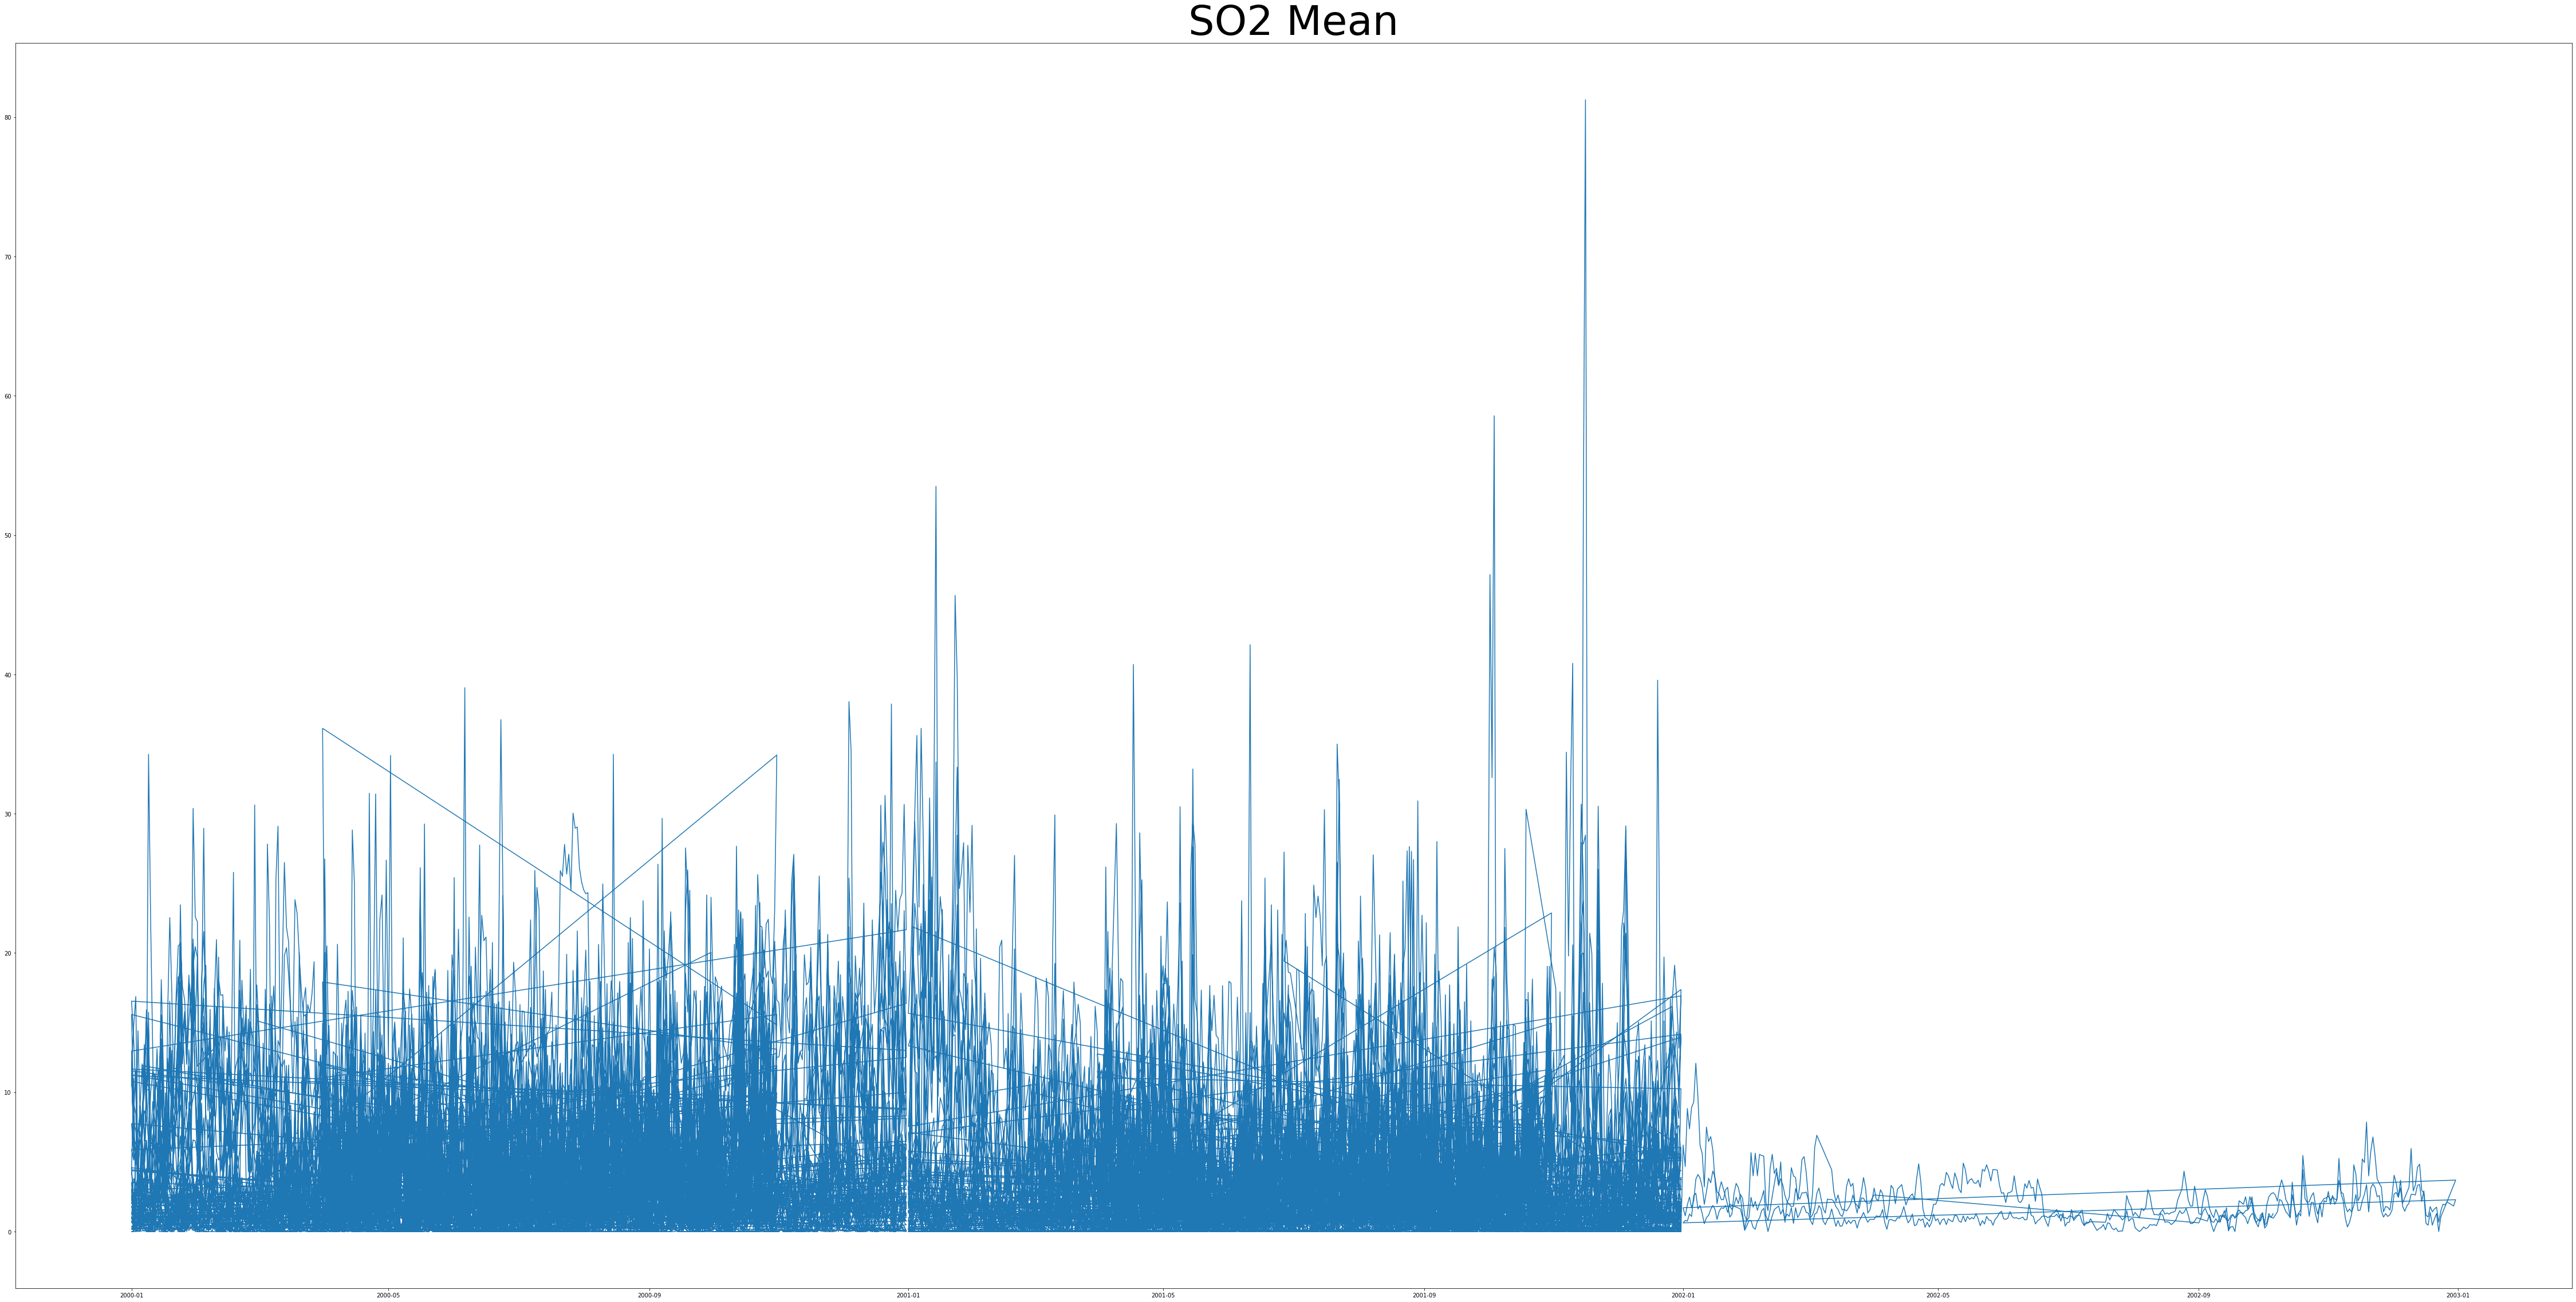

In [34]:
plt.figure(figsize=(80,40))
plt.plot(date, so2)
plt.title('SO2 Mean',
          fontsize=72);

In [35]:
x_train, x_valid, y_train, y_valid = train_test_split(so2, date, train_size=0.8, test_size = 0.2, shuffle = False )

In [36]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [37]:
tf.keras.backend.set_floatx('float64')

In [38]:
train_set = windowed_dataset(x_train, window_size=64, batch_size=200, shuffle_buffer=1000)
val_set = windowed_dataset(x_valid, window_size=64, batch_size=200, shuffle_buffer=1000)

In [39]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(256, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])



In [40]:
Mae = (df1['SO2 Mean'].max() - df1['SO2 Mean'].min()) * 10/100
print(Mae)

8.125


In [41]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<2.9 and logs.get('val_mae')<2.9):
      print("\nMAE dari model < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [42]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(train_set, validation_data=val_set, epochs=50, callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
185/185 [==============================] - 372s 2s/step - loss: 2.2128 - mae: 2.6180 - val_loss: 2.7832 - val_mae: 3.2109
Epoch 2/50
185/185 [==============================] - 360s 2s/step - loss: 1.5392 - mae: 1.9460 - val_loss: 2.2392 - val_mae: 2.6735

MAE dari model < 10% skala data


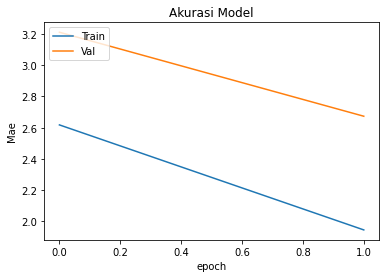

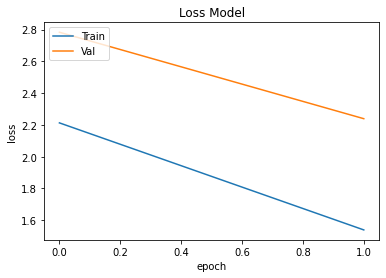

In [43]:
# Plot Accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Akurasi Model')
plt.ylabel('Mae')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()